In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bitcoin.csv")
df.head()

,Date,Price
0,5/23/2019,7881.846680
1,5/24/2019,7987.371582
2,5/25/2019,8052.543945
3,5/26/2019,8673.215820
4,5/27/2019,8805.778320


In [3]:
predictionDays = 7
df['Prediction'] = df[['Price']].shift(-predictionDays)
df.head()

,Date,Price,Prediction
0,5/23/2019,7881.846680,8319.472656
1,5/24/2019,7987.371582,8574.501953
2,5/25/2019,8052.543945,8564.016602
3,5/26/2019,8673.215820,8742.958008
4,5/27/2019,8805.778320,8208.995117


In [4]:
X = df[['Price']].values
X = X[:-predictionDays]
X.shape

(360, 1)

In [5]:
y = df['Prediction']
y = y[:-predictionDays]
y[0:5]

0    8319.472656
1    8574.501953
2    8564.016602
3    8742.958008
4    8208.995117
Name: Prediction, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(288, 1) (288,)
(72, 1) (72,)


In [7]:
X_test[0:5]

array([[ 6985.470215],
       [ 8043.951172],
       [11959.37109 ],
       [ 9552.860352],
       [ 8807.010742]])

In [8]:
X_with_nan_output = df[['Price']].values[-predictionDays:]

Text(0, 0.5, 'next week price')

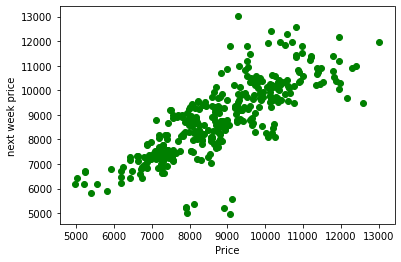

In [9]:
plt.plot(X,y,'go')
plt.xlabel('Price')
plt.ylabel('next week price')

In [31]:
from sklearn.metrics import r2_score
from sklearn.svm import SVR

MD = 5
mean_acc = np.zeros((MD-1))
S=['rbf','poly','linear','sigmoid']
for i in range(len(S)):
    clf = SVR(kernel=S[i])
    clf.fit(X_train, y_train) 
    y_predict = clf.predict(X_test)
    mean_acc[i-1] = r2_score(y_test,y_predict)
print('acc are: ',mean_acc)    # so the poly is chosen

acc are:  [ 5.94790164e-01  6.02649219e-01 -1.31932323e-04  4.27108920e-02]


In [40]:
from sklearn.svm import SVR
svr = SVR(kernel='poly',C=1e3)
svr.fit(X_train,y_train)

SVR(C=1000.0, kernel='poly')

In [41]:
svr.score(X_test,y_test) #r2_score

0.5929031977705004

In [42]:
y_predict = svr.predict(X_test)

In [43]:
from sklearn.metrics import r2_score
print('the r2_score is: ',r2_score(y_test,y_predict))

the r2_score is:  0.5929031977705004


In [14]:
df_week = df[['Date','Price']][-predictionDays:]

In [17]:
y_week = svr.predict(X_with_nan_output)
df_week['Prdiction for next week'] = y_week 
df_week.head()

,Date,Price,Prdiction for next week
360,5/17/2020,9670.739258,9508.365703
361,5/18/2020,9726.575195,9563.418373
362,5/19/2020,9729.038086,9565.840234
363,5/20/2020,9522.981445,9362.089890
364,5/21/2020,9081.761719,8947.220526


In [18]:
df_week.reset_index(drop=True)

,Date,Price,Prdiction for next week
0,5/17/2020,9670.739258,9508.365703
1,5/18/2020,9726.575195,9563.418373
2,5/19/2020,9729.038086,9565.840234
3,5/20/2020,9522.981445,9362.089890
4,5/21/2020,9081.761719,8947.220526
5,5/22/2020,9182.577148,9036.211171
6,5/23/2020,9180.045898,9033.920947


#### with polynomial regression

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
features = poly.fit_transform(X_train)
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(features,y_train)

LinearRegression()

In [20]:
regr.intercept_

63.64415128773544

In [21]:
regr.coef_

array([ 0.00000000e+00,  1.23311076e+00, -2.62172436e-05])

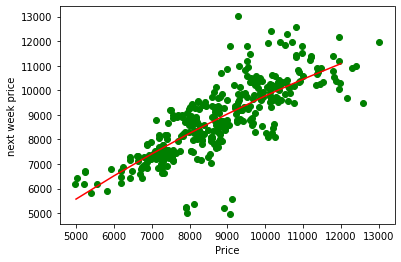

In [22]:
plt.plot(X,y,'go')
plt.xlabel('Price')
plt.ylabel('next week price')
XX = np.arange(5000, 13000,1000)
yy = regr.intercept_+ regr.coef_[1]*XX+ regr.coef_[2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )

In [23]:
features_poly = poly.fit_transform(X_test)
y_predict_poly = regr.predict(features_poly)

In [24]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test - y_predict_poly)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test - y_predict_poly) ** 2))
print("R2-score: %.2f" % r2_score(y_test,y_predict_poly) )

Mean absolute error: 698.81
Residual sum of squares (MSE): 1183528.53
R2-score: 0.60


In [25]:
features_poly_week = poly.fit_transform(X_with_nan_output)
y_week2 = regr.predict(features_poly_week)

In [26]:
df_week2 = df[['Date','Price']][-predictionDays:]
df_week2['Prdiction for next week'] = y_week2
df_week2.reset_index(drop=True)

,Date,Price,Prdiction for next week
0,5/17/2020,9670.739258,9536.816361
1,5/18/2020,9726.575195,9577.273218
2,5/19/2020,9729.038086,9579.053983
3,5/20/2020,9522.981445,9428.967296
4,5/21/2020,9081.761719,9100.106079
5,5/22/2020,9182.577148,9176.148147
6,5/23/2020,9180.045898,9174.245423
